In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 5)
saved_style_state = matplotlib.rcParams.copy()

#load:
aircraft_crashes = pd.read_csv("aircraft_crashes.csv")

First rows:

In [2]:
aircraft_crashes.head(4)

,date,time,location,operator,flight_number,route,type,registration,id,aboard,fatalities,ground_fatalities,summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...


In [3]:
aircraft_crashes.columns

Index(['date', 'time', 'location', 'operator', 'flight_number', 'route',
       'type', 'registration', 'id', 'aboard', 'fatalities',
       'ground_fatalities', 'summary'],
      dtype='object')

First row:

In [5]:
row_one = aircraft_crashes.iloc[0]
row_one

date                                                        09/17/1908
time                                                             17:18
location                                           Fort Myer, Virginia
operator                                          Military - U.S. Army
flight_number                                                      NaN
route                                                    Demonstration
type                                                  Wright Flyer III
registration                                                       NaN
id                                                                   1
aboard                                                             2.0
fatalities                                                         1.0
ground_fatalities                                                  0.0
summary              During a demonstration flight, a U.S. Army fly...
Name: 0, dtype: object

In [15]:
aircraft_crashes['fatalities']

0         1.0
1         5.0
2         1.0
3        14.0
4        30.0
        ...  
5263     98.0
5264      4.0
5265    228.0
5266      1.0
5267     13.0
Name: fatalities, Length: 5268, dtype: float64

Text(0, 0.5, 'Frequency')

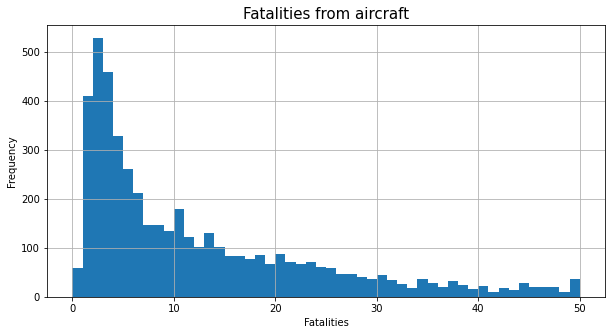

In [40]:
aircraft_crashes.fatalities[aircraft_crashes.fatalities <= 50].hist(bins=50)
plt.title("Fatalities from aircraft", fontsize=15)
plt.xlabel('Fatalities', fontsize=10)
plt.ylabel('Frequency', fontsize=10)